<a href="https://colab.research.google.com/github/agamsaikumar10/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

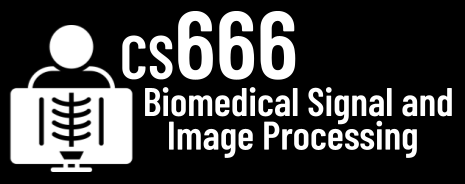
#Assignment 5

In [3]:
# NAME: SAI KUMAR AGAM

In [4]:
# In this assignment, we will visualize and explore a CT scan!

In [5]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# we are using pydicom, so lets install it!
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.7 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [7]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.

In [8]:
# TODO: YOUR CODE

In [9]:
# Then use the following snippet to extract the data.

In [10]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/ct (1).zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [11]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [48]:
# TODO: YOUR_ANSWER


220 Slicer are there

In [13]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [14]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

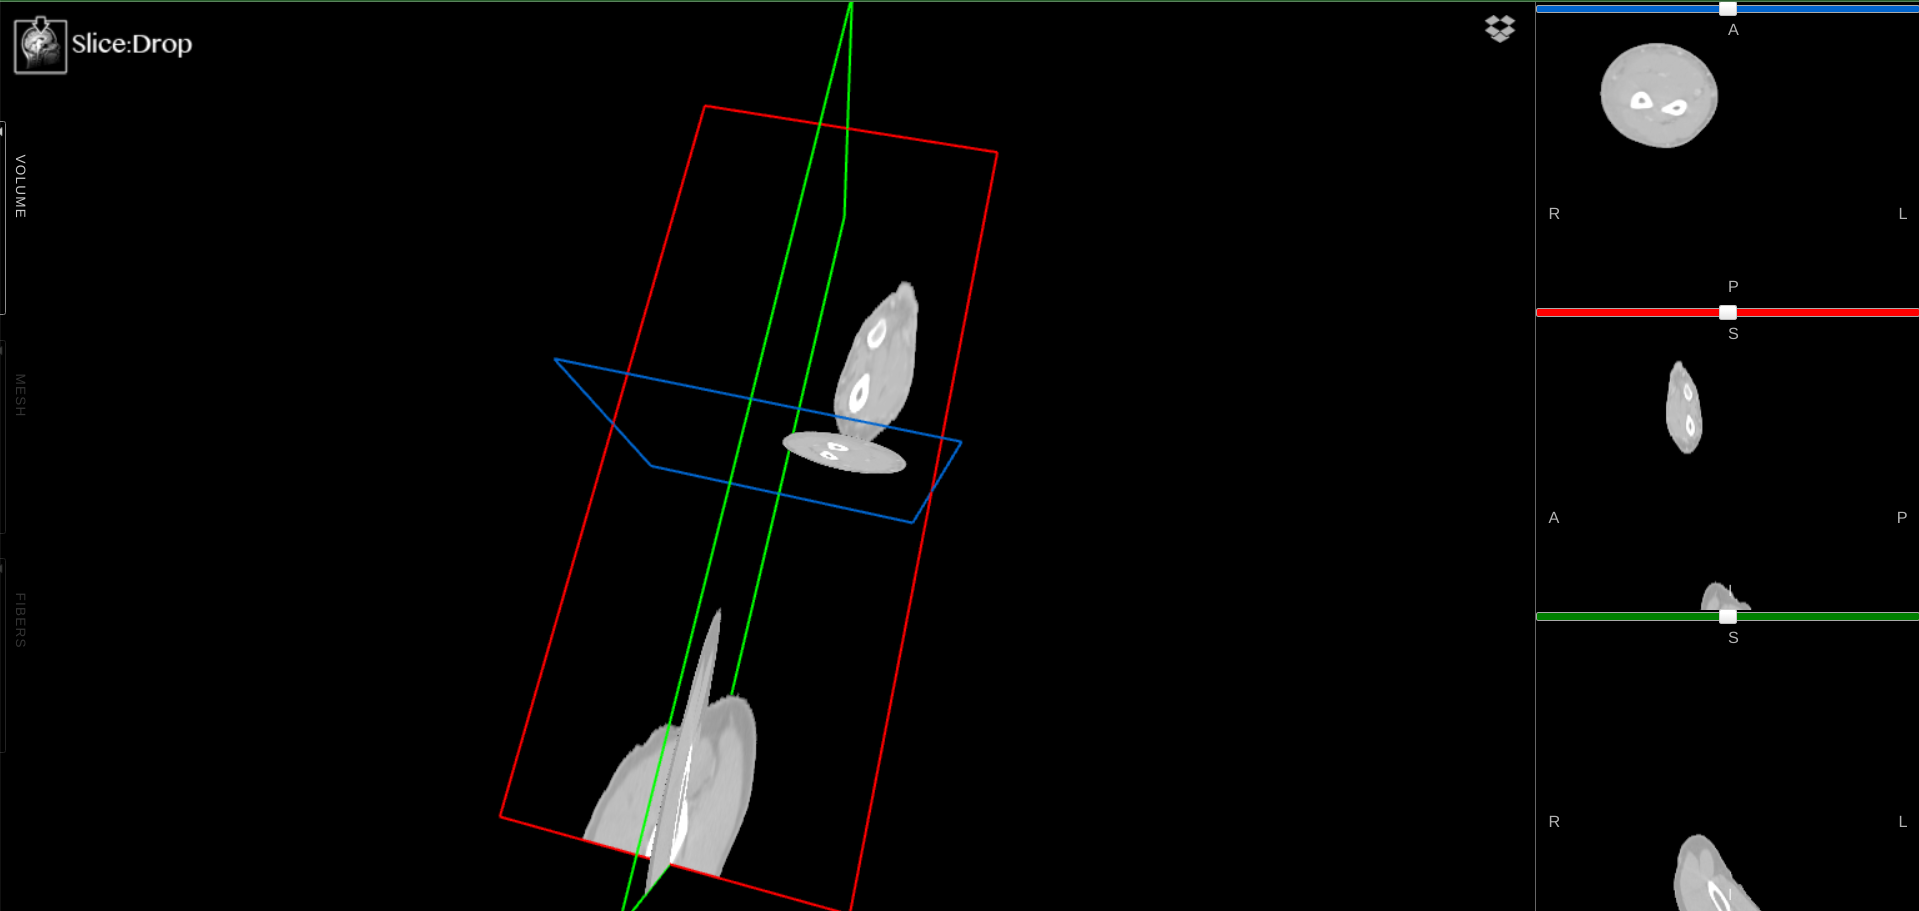

In [15]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [16]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

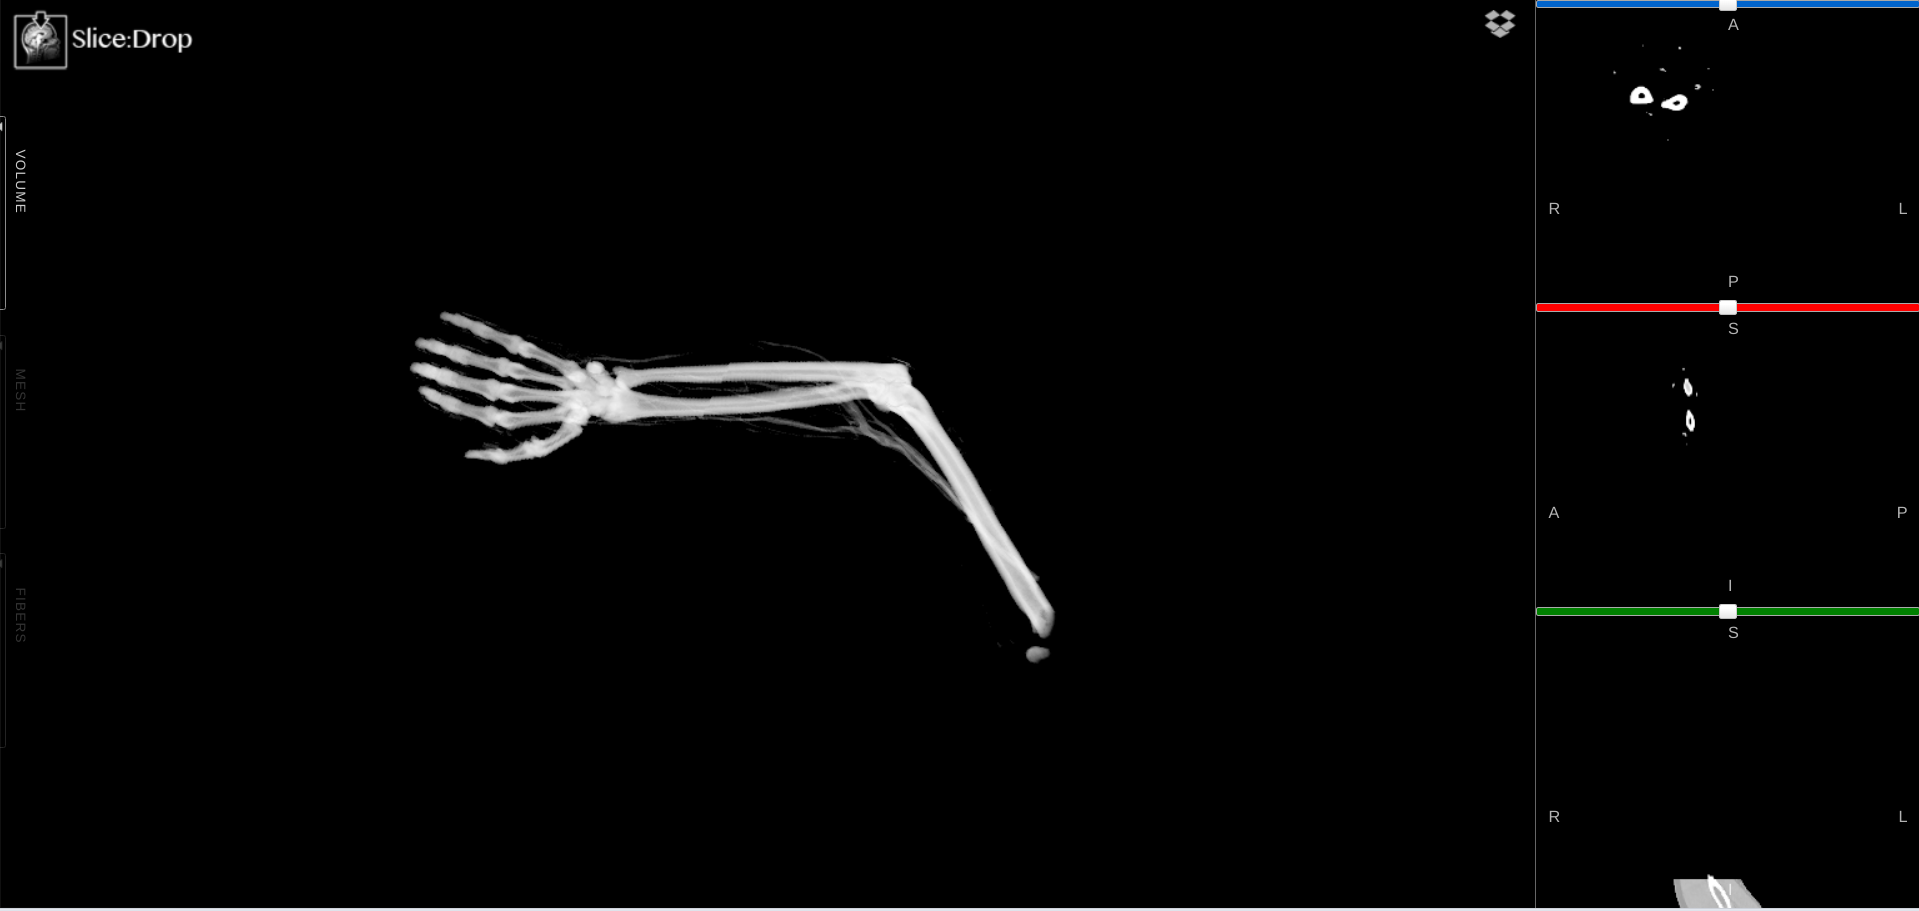

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [17]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [18]:
from pydicom import dcmread

In [47]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os
import numpy as np

directory = "ct"
dcm_files = os.listdir(directory)
dcm_list = []
dcm_files.sort()

for dcm_file in dcm_files:
  df = dcmread(os.path.join(directory, dcm_file))
  dcm_list.append(df)

pixel_array_list = []
for dcm in dcm_list:
  pixel_array_list.append(dcm.pixel_array)

numpy_3D_array_custom = np.array(pixel_array_list)
print(np.shape(numpy_3D_array_custom))


(220, 454, 512)


In [20]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

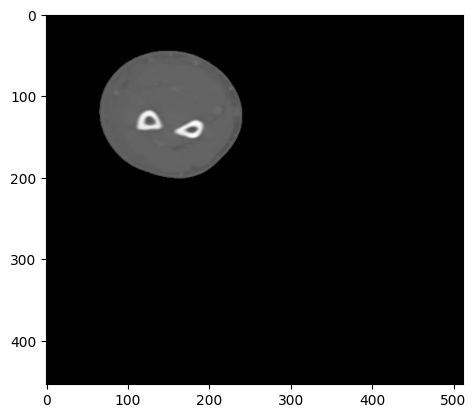

In [21]:
# TODO: YOUR CODE FOR AXIAL
import matplotlib.pyplot as plt
plt.imshow(numpy_3D_array[110,:,:],cmap='gray')

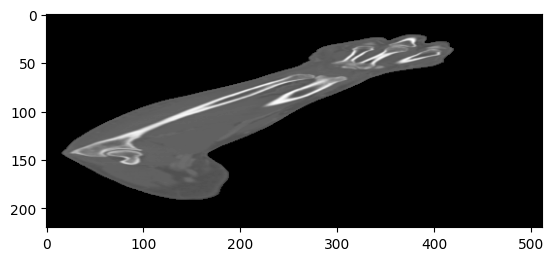

In [22]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(numpy_3D_array[:,120,:],cmap='gray')

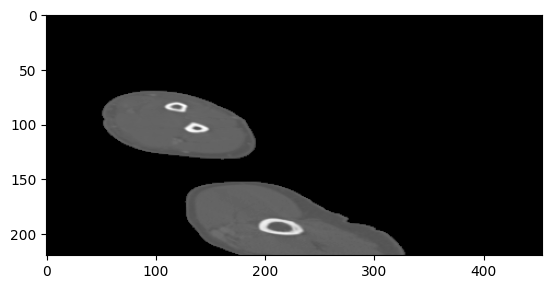

In [23]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(numpy_3D_array[:,:,200],cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [24]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [25]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [46]:
# TODO: YOUR CODE
custom_level = dcm_list[0][(0x0028,0x1050)].value
print("Window Center = ", custom_level)

custom_window = dcm_list[0][(0x0028,0x1051)].value
print("Window Width = ", custom_window)

custom_rescale = dcm_list[0][(0x0028,0x1052)].value
print("Rescale Intercept = ", custom_rescale)


Window Center =  30
Window Width =  410
Rescale Intercept =  -1024


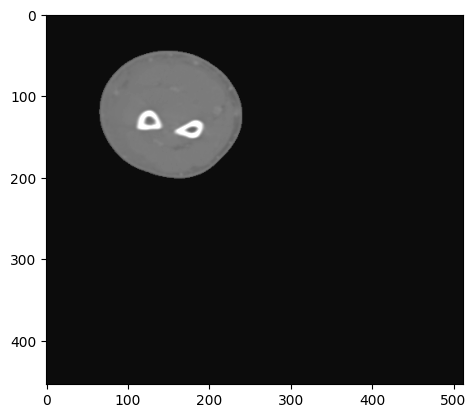

In [45]:
custom_min = level - window/2
custom_max = level + window/2
plt.imshow(numpy_3D_array[110] + rescale, cmap='gray', vmin=custom_min, vmax=custom_max)
plt.show()



In [28]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

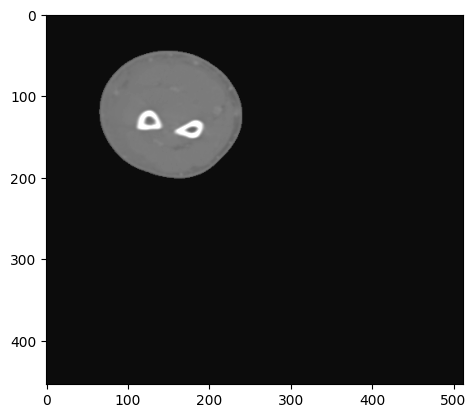

In [43]:
# TODO: YOUR CODE
window_custom = 2500
level_custom = 100

vmin_custom = level_custom - window_custom/2
vmax_custom = level_custom + window_custom/2
plt.imshow(numpy_3D_array[110] + rescale, cmap='gray', vmin=vmin_custom, vmax=vmax_custom)
plt.show()


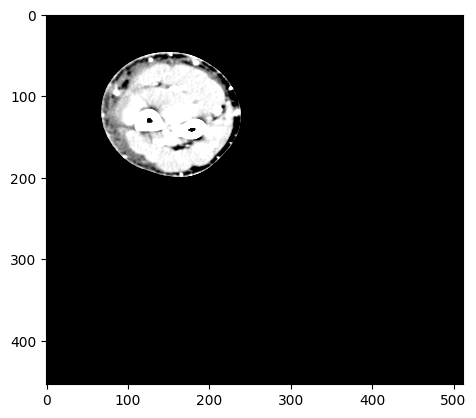

In [44]:
frame = 100
brightness_level = 10

min_brightness = brightness_level - frame/2
max_brightness = brightness_level + frame/2
plt.imshow(numpy_3D_array[110] + rescale, cmap='gray', vmin=min_brightness, vmax=max_brightness)
plt.show()


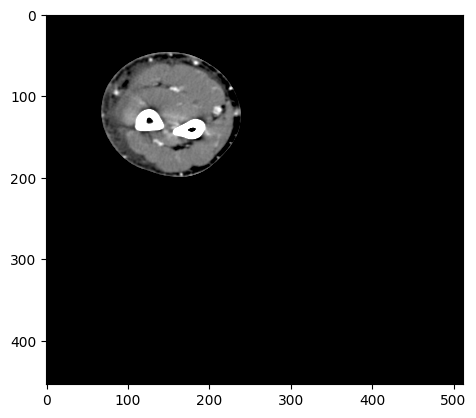

In [31]:
window = 205
level = 60

vmin = level - window/2
vmax = level + window/2
plt.imshow(numpy_3D_array[110] + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [30]:
# Which values make sense and why?

In [29]:
# TODO: YOUR ANSWER
# Values near window = 205 and level = 50 makes sense

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [34]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

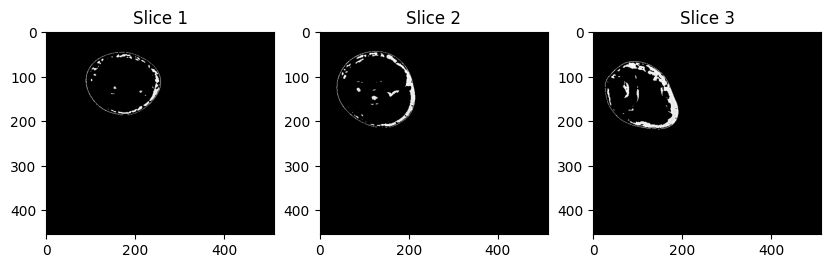

In [42]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_range_custom = (800, 1000)

fat_mask_custom = np.zeros_like(numpy_3D_array, dtype=np.int16)
fat_mask_custom = np.where(np.logical_or(numpy_3D_array < fat_range_custom[0], numpy_3D_array > fat_range_custom[1]), fat_mask_custom, numpy_3D_array)
fig_custom, axes_custom = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for i_custom, ax_custom in enumerate(axes_custom.flatten()):
    ax_custom.imshow(fat_mask_custom[100 + i_custom*25, :, :], cmap='gray')
    ax_custom.set_title(f"Slice {i_custom+1}")

plt.show()


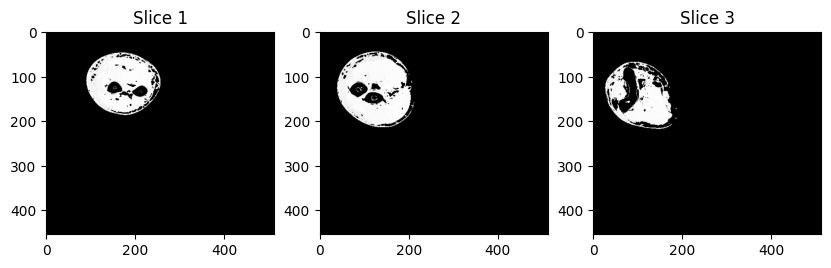

In [41]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
soft_range_custom = (1000, 1100)

soft_mask_custom = np.zeros_like(numpy_3D_array, dtype=np.int16)
soft_mask_custom = np.where(np.logical_or(numpy_3D_array < soft_range_custom[0], numpy_3D_array > soft_range_custom[1]), soft_mask_custom, numpy_3D_array)
fig_custom, axes_custom = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for i_custom, ax_custom in enumerate(axes_custom.flatten()):
    ax_custom.imshow(soft_mask_custom[100 + i_custom*25, :, :], cmap='gray')
    ax_custom.set_title(f"Slice {i_custom+1}")

plt.show()


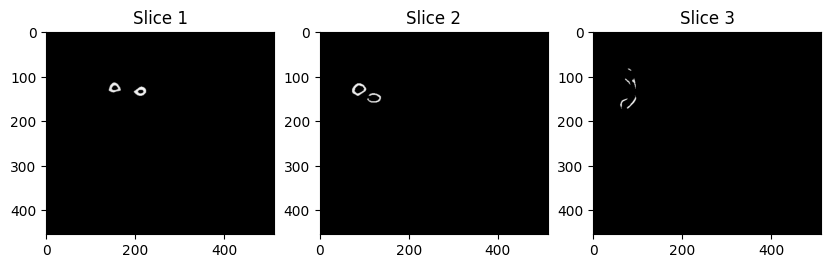

In [40]:
# TODO: YOUR CODE TO SEGMENT BONES
bone_range_custom = (2000, 2900)

bone_mask_custom = np.zeros_like(numpy_3D_array, dtype=np.int16)
bone_mask_custom = np.where(np.logical_or(numpy_3D_array < bone_range_custom[0], numpy_3D_array > bone_range_custom[1]), bone_mask_custom, numpy_3D_array)
fig_custom, axes_custom = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for i_custom, ax_custom in enumerate(axes_custom.flatten()):
    ax_custom.imshow(bone_mask_custom[100 + i_custom*25, :, :], cmap='gray')
    ax_custom.set_title(f"Slice {i_custom+1}")

plt.show()


In [38]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER
Yes Segmentations looks Good

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""